In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
silsoJD = pd.read_csv('./sunspot_data/SILSO_daily_inJD.txt', delimiter='\s+', usecols=[0,1,2,3,4], skiprows=1)

silsoJD.columns = ['JD', 'SSN', 'std', 'observations', 'definitive indicator']

In [20]:
silsoJD

,JD,SSN,std,observations,definitive indicator
0,2385070.5,-1.0,-1.0,0.0,1.0
1,2385071.5,-1.0,-1.0,0.0,1.0
2,2385072.5,-1.0,-1.0,0.0,1.0
3,2385073.5,-1.0,-1.0,0.0,1.0
4,2385074.5,-1.0,-1.0,0.0,1.0
...,...,...,...,...,...
73865,2458935.5,0.0,0.0,43.0,0.0
73866,2458936.5,0.0,0.0,39.0,0.0
73867,2458937.5,0.0,0.0,36.0,0.0
73868,2458938.5,4.0,0.2,9.0,0.0


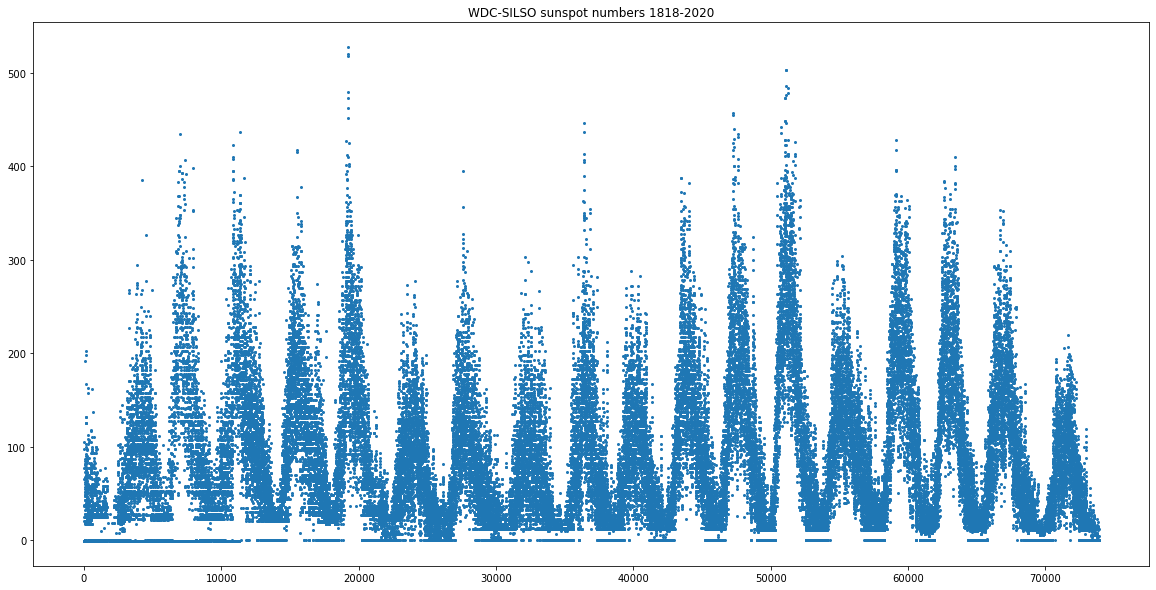

In [21]:
plt.figure(figsize=(20,10))
plt.title('WDC-SILSO sunspot numbers 1818-2020')
plt.scatter(range(len(silsoJD['SSN'])), silsoJD['SSN'], s=4)

#note: value of -1 means no data collected that day. need to cut out

In [62]:
import numpy as np

cleaned_data = silsoJD['SSN'].replace(-1.0, np.nan)
dates = [date for date in range(len(silsoJD['SSN']))]

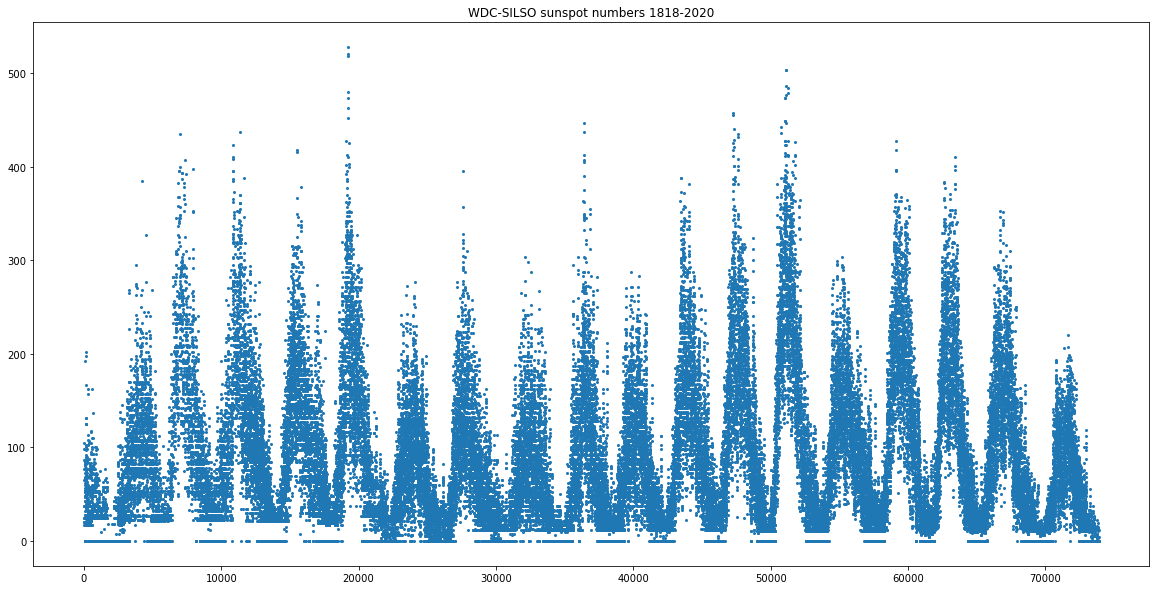

In [63]:
plt.figure(figsize=(20,10))
plt.title('WDC-SILSO sunspot numbers 1818-2020')
plt.scatter(dates, cleaned_data, s=4)

In [163]:
#units are JD
small_period = [date/650 + 9 for date in dates]
big_period = [date/6000 for date in dates]

#units are counts
small_amplitude = 150 
big_amplitude = 50

small_offset = 100
big_offset = 50

small_function = (small_amplitude*(np.sin(small_period)) + small_offset)
big_function = (big_amplitude * (np.sin(big_period)) + big_offset)

total_function = small_function + big_function

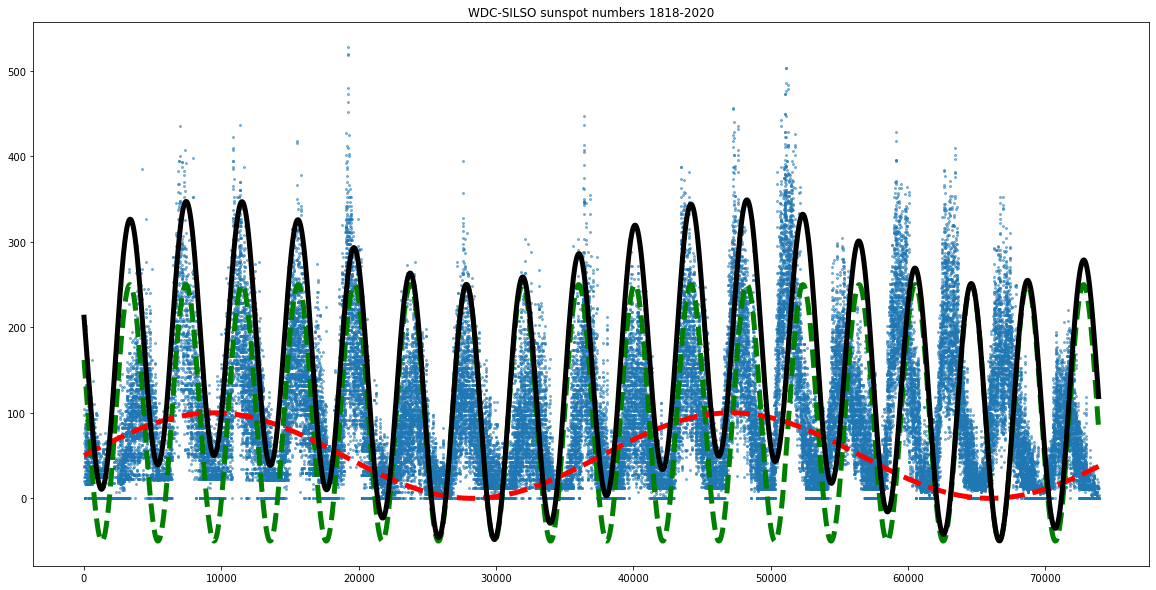

In [166]:
plt.figure(figsize=(20,10))
plt.title('WDC-SILSO sunspot numbers 1818-2020')
plt.scatter(dates, cleaned_data, s=4, alpha=0.5)
plt.plot(dates, small_function, c='g', ls='--', linewidth=5)
plt.plot(dates, big_function, c='r', ls='--', linewidth=5)
plt.plot(dates, total_function, c='k', linewidth=5)